In [22]:
import comprei.utils as cp
import pandas as pd


In [2]:
dir = '../data/_teste rápido_//'
keyword = "teste rápido"



In [3]:
! grep -r -i -C 10 --group-separator="==========" "$keyword" "$dir" > temp.txt
! sed -i 's_.*txt__g' temp.txt

there are 78 matches




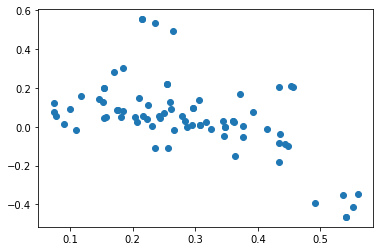

In [4]:
with open("temp.txt", "r") as selected_contexts_file:
  file_content = selected_contexts_file.read()
  file_content_splitted = file_content.split("==========")

cp.plot_corpus(file_content_splitted)


In [5]:
df = pd.DataFrame({'text':file_content_splitted})
df["id"] = df.index + 1
df["id"] = ["text_" + str(i) for i in df["id"]]
df

,text,id
0,-aproximadamente 32 mil testes para a esc...,text_1
1,\n-TORNA PÚBLICO AOS INTERESSADOS QUE ESTÁ ABE...,text_2
2,\n- ...,text_3
3,\n-necessidades do setor de obras e manutenção...,text_4
4,\n-\n-\n-\n-CONTRATO 079/2020\n- ...,text_5
...,...,...
73,\n- ...,text_74
74,\n-http://dlc.pmf.sc.gov.br. O Pregoeiro. ...,text_75
75,\n-LOCATÁRIA: Secretaria Municipal de Saúde/Fu...,text_76
76,\n-Art. 1º Fica nomeada a Servidora SAMANTA MA...,text_77


In [6]:
def classificar(df):
    """
    
    
    Args
        A dataframe with columns for text and id
        
    Returns
        dict: A dictionary with the user defined classes.
        
    
    
    """
    classes = {}
    for i, row in df.iterrows():
        classes[row["id"]] = "unlabeled"
        

    for i, row in df.iterrows():
        print(row["text"])
        print_tipos()
        class_of_snippet = input("Qual é o tipo que mais se aproxima desse snippet?")

        classes[row["id"]] = class_of_snippet
        clear_output()

        if input('continuar?(y/n)') == 'n':
            break
                
    
    return(classes)
    print(classes)

In [8]:
classes = cp.classificar(df)

continuar?(y/n) n


In [9]:
classes

{'text_1': '6',
 'text_2': '3',
 'text_3': '1',
 'text_4': '4',
 'text_5': '1',
 'text_6': '1',
 'text_7': '6',
 'text_8': '6',
 'text_9': '1',
 'text_10': '1',
 'text_11': '1',
 'text_12': '1',
 'text_13': '6',
 'text_14': '6',
 'text_15': '6',
 'text_16': '1',
 'text_17': '1',
 'text_18': '1',
 'text_19': '1',
 'text_20': '1',
 'text_21': '6',
 'text_22': '6',
 'text_23': '3',
 'text_24': '6',
 'text_25': '1',
 'text_26': '6',
 'text_27': '1',
 'text_28': '6',
 'text_29': '3',
 'text_30': '3',
 'text_31': '4',
 'text_32': '6',
 'text_33': '1',
 'text_34': 'unlabeled',
 'text_35': 'unlabeled',
 'text_36': 'unlabeled',
 'text_37': 'unlabeled',
 'text_38': 'unlabeled',
 'text_39': 'unlabeled',
 'text_40': 'unlabeled',
 'text_41': 'unlabeled',
 'text_42': 'unlabeled',
 'text_43': 'unlabeled',
 'text_44': 'unlabeled',
 'text_45': 'unlabeled',
 'text_46': 'unlabeled',
 'text_47': 'unlabeled',
 'text_48': 'unlabeled',
 'text_49': 'unlabeled',
 'text_50': 'unlabeled',
 'text_51': 'unlabeled'

In [18]:
df["label"] = df["id"].map(classes)

In [26]:
data2D = cp.get_2d_representation(file_content_splitted)

df["d1"] = data2D[:,0]
df["d2"] = data2D[:,1]
df

,text,id,label,d1,d2
0,-aproximadamente 32 mil testes para a esc...,text_1,6,0.099164,0.082702
1,\n-TORNA PÚBLICO AOS INTERESSADOS QUE ESTÁ ABE...,text_2,3,0.305127,0.129480
2,\n- ...,text_3,1,0.456058,0.198003
3,\n-necessidades do setor de obras e manutenção...,text_4,4,0.360083,0.049158
4,\n-\n-\n-\n-CONTRATO 079/2020\n- ...,text_5,1,0.376052,-0.038755
...,...,...,...,...,...
73,\n- ...,text_74,unlabeled,0.216700,0.065488
74,\n-http://dlc.pmf.sc.gov.br. O Pregoeiro. ...,text_75,unlabeled,0.346169,-0.032617
75,\n-LOCATÁRIA: Secretaria Municipal de Saúde/Fu...,text_76,unlabeled,0.307223,-0.021367
76,\n-Art. 1º Fica nomeada a Servidora SAMANTA MA...,text_77,unlabeled,0.230002,0.006717


NameError: name 'filename' is not defined

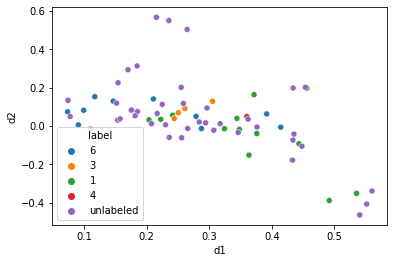

In [27]:
import seaborn as sns
g = sns.scatterplot(x="d1", y="d2",
          hue="label",
          data=df);

plot = g.get_figure()
plot.savefig("testes_raw_2020_10_01.png")

In [61]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.semi_supervised import LabelSpreading
import nltk

vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('portuguese'))
X = vectorizer.fit_transform(file_content_splitted)


foo = df["label"]
foo[foo == "unlabeled"] = -1


label_spread = LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(X.toarray(), foo.astype(int))

/home/lubianat/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


LabelSpreading(alpha=0.8, kernel='knn')

In [65]:
output_labels = label_spread.transduction_
output_labels

df["inferred_labels"] = output_labels

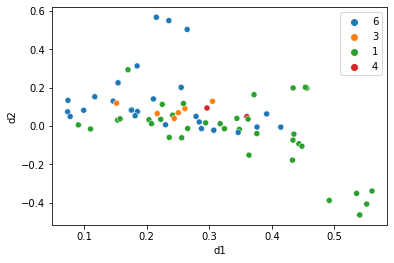

In [66]:

df["inferred_labels"]
g = sns.scatterplot(x="d1", y="d2",
          hue=output_labels.astype(str),
          data=df);

plot = g.get_figure()


In [64]:
plot.savefig("testes_raw_progagado_2020_10_01.png")

In [86]:
df_enriched_for_buyings = df[df["label"] == -1]

df_enriched_for_buyings = df_enriched_for_buyings[df_enriched_for_buyings["inferred_labels"] == 1]

In [87]:
classes_enriched = cp.classificar(df_enriched_for_buyings)

continuar?(y/n) 


In [99]:
classes_enriched

{'text_34': '1',
 'text_35': '3',
 'text_38': '1',
 'text_40': '1',
 'text_43': '1',
 'text_44': '6',
 'text_45': '1',
 'text_49': '6',
 'text_50': '1',
 'text_51': '1',
 'text_53': '6',
 'text_54': '1',
 'text_55': '1',
 'text_56': '4',
 'text_57': '6',
 'text_58': '1',
 'text_59': '1',
 'text_61': '1',
 'text_65': '3',
 'text_66': '3',
 'text_68': '1',
 'text_70': '1'}

In [111]:
res = 0
for key in classes_enriched: 
    if classes_enriched[key] == "1": 
        res = res + 1
        
prop_after_enrichment = res/len(classes_enriched)

In [112]:
res = 0
for key in classes: 
    if classes[key] == "1": 
        res = res + 1

        
tot = 0
for key in classes: 
    if classes[key] != "unlabeled": 
        tot = tot + 1

prop_before_enrichment = res/tot

In [113]:
prop_after_enrichment

0.6363636363636364

In [114]:
prop_before_enrichment

0.45454545454545453

In [115]:
df["labels_after_prop"] = df["id"].map(classes_enriched)

In [116]:
df

,text,id,label,d1,d2,inferred_labels,labels_after_prop
0,-aproximadamente 32 mil testes para a esc...,text_1,6,0.099164,0.082702,6,NaN
1,\n-TORNA PÚBLICO AOS INTERESSADOS QUE ESTÁ ABE...,text_2,3,0.305127,0.129480,3,NaN
2,\n- ...,text_3,1,0.456058,0.198003,1,NaN
3,\n-necessidades do setor de obras e manutenção...,text_4,4,0.360083,0.049158,4,NaN
4,\n-\n-\n-\n-CONTRATO 079/2020\n- ...,text_5,1,0.376052,-0.038755,1,NaN
...,...,...,...,...,...,...,...
73,\n- ...,text_74,-1,0.216700,0.065488,3,NaN
74,\n-http://dlc.pmf.sc.gov.br. O Pregoeiro. ...,text_75,-1,0.346169,-0.032617,6,NaN
75,\n-LOCATÁRIA: Secretaria Municipal de Saúde/Fu...,text_76,-1,0.307223,-0.021367,6,NaN
76,\n-Art. 1º Fica nomeada a Servidora SAMANTA MA...,text_77,-1,0.230002,0.006717,6,NaN


In [121]:
df.to_csv("testes_anotado_2020_10_01.csv")